In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelBinarizer

In [3]:
df=pd.read_csv('winequality-red.csv')

In [4]:
## 혼자 해본거

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.shape

(1599, 12)

In [8]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
alcohol=df['alcohol'].values

In [10]:
fixed_acidity=df['fixed acidity'].values

In [11]:
pH=df['pH'].values

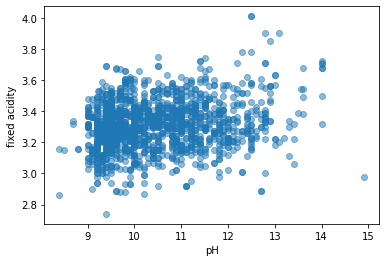

In [12]:
plt.scatter(alcohol, pH, alpha=0.5)
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.show()

In [13]:
print(df.corr(method='pearson'))

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [14]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


# 1~6 'Bad'  
# 7~8 'Good'

In [15]:
df.groupby('quality')['alcohol'].median()

quality
3     9.925
4    10.000
5     9.700
6    10.500
7    11.500
8    12.150
Name: alcohol, dtype: float64

In [16]:
df['quality']=np.where(df['quality'] <=6,'bad','good')

In [17]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

### 모델링

In [18]:
x=df.drop('quality',axis=1)
y=df.quality

In [19]:
y

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: object

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [120]:
model=DecisionTreeClassifier(max_depth=7,)

### DecisionTreeClassifier는 scaler 사용 불가능!!

In [ ]:
#scaler=StandardScaler()

In [ ]:
#x_train=scaler.fit_transform(x_train)

In [ ]:
#x_test=scaler.transform(x_test)

In [121]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [122]:
model.score(x_train,y_train)

0.9546520719311963

In [123]:
model.score(x_test,y_test)

0.909375

### imbalanced DATA F1 score 이용하기

In [10]:
df.quality.value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [131]:
pred=model.predict(x_test)

In [132]:
f1_score(pred,y_test)

ValueError: pos_label=1 is not a valid label. It should be one of ['bad', 'good']

In [134]:
binarizer=LabelBinarizer()

In [135]:
binarizer.fit(y_test)

LabelBinarizer()

In [137]:
f1_score(binarizer.transform(pred),binarizer.transform(y_test))

0.6666666666666666

In [140]:
y

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: object

In [141]:
f1_score(pred,y_test,pos_label='bad')

0.9475587703435806

In [142]:
from sklearn.metrics import confusion_matrix # =classification_report

In [144]:
confusion_matrix(pred,y_test,labels=['good','bad'])

array([[ 29,  15],
       [ 14, 262]], dtype=int64)

In [147]:
from sklearn.metrics import classification_report # 보기 편함

In [146]:
print(classification_report(pred,y_test)) ### f-1보다 macro avg가 좀 더 정확하다 

              precision    recall  f1-score   support

         bad       0.95      0.95      0.95       276
        good       0.67      0.66      0.67        44

    accuracy                           0.91       320
   macro avg       0.81      0.80      0.81       320
weighted avg       0.91      0.91      0.91       320



In [148]:
f1_score(pred,y_test, average='macro')

0.8071127185051237

### 중요도 확인하기

In [159]:
model.feature_importances_

array([0.04328778, 0.06862554, 0.01892575, 0.06884876, 0.0386125 ,
       0.06779419, 0.12494946, 0.00483686, 0.11512965, 0.13997778,
       0.30901173])

In [160]:
model.feature_names_in_

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [158]:
pd.DataFrame(list(zip(model.feature_importances_,model.feature_names_in_)),columns=['Features','importance']).sort_values('importance', ascending=True)

,Features,importance
10,0.309012,alcohol
4,0.038612,chlorides
2,0.018926,citric acid
7,0.004837,density
0,0.043288,fixed acidity
5,0.067794,free sulfur dioxide
8,0.115130,pH
3,0.068849,residual sugar
9,0.139978,sulphates
6,0.124949,total sulfur dioxide


### Tree 그림 그리기

In [162]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

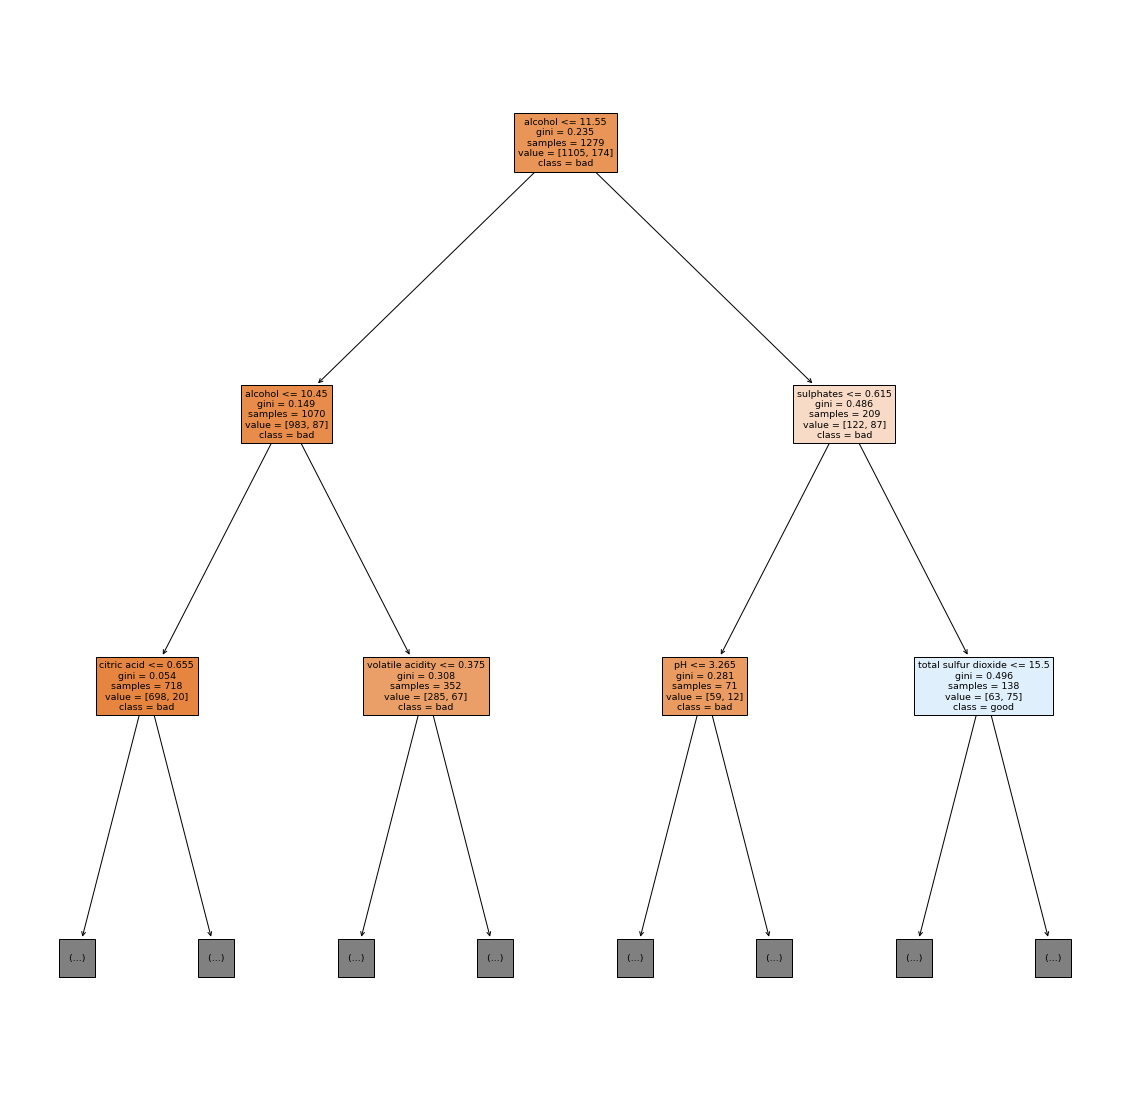

In [165]:
plt.figure(figsize=(20,20))
plot_tree(model,feature_names=x.columns,
          class_names=['bad','good'],filled=True,max_depth=2)
plt.show()

In [166]:
#### 새로운 cmd창에서 conda install python-graphviz

In [167]:
from sklearn.tree import export_graphviz
import graphviz

In [168]:
dot_data=export_graphviz(model, feature_names=x.columns,
                         class_names=['bad','good'],filled=True, rounded=True)

In [170]:
graph=graphviz.Source(dot_data)

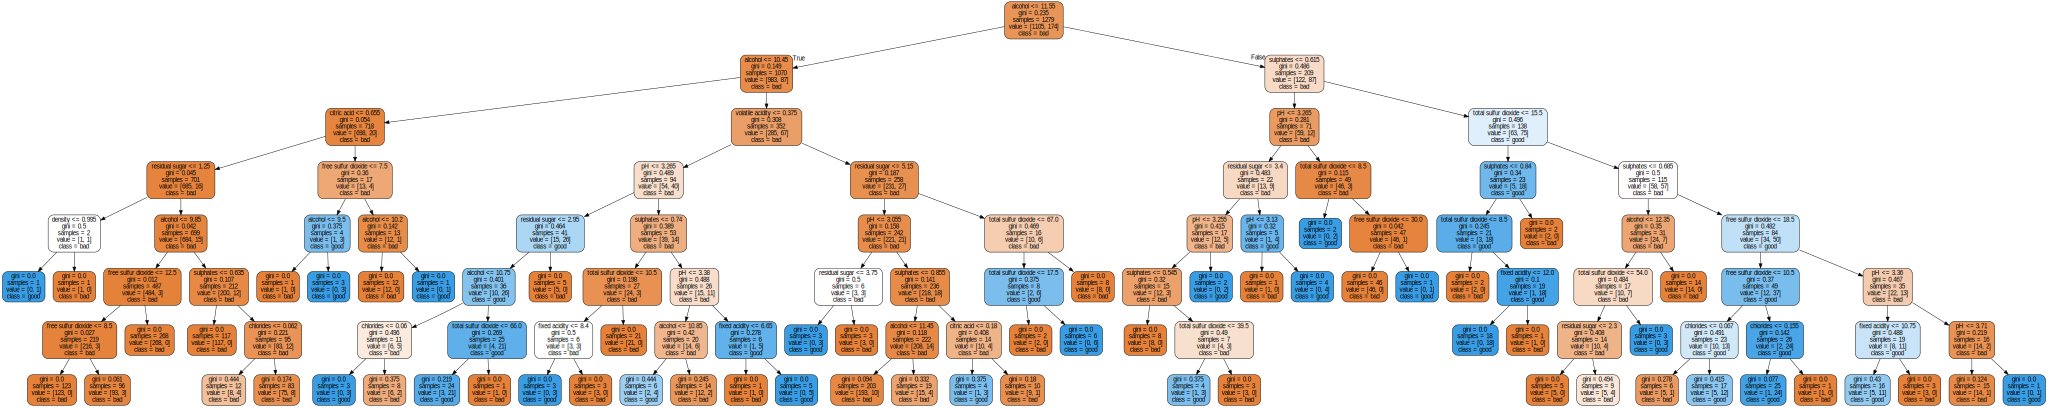

In [171]:
graph

### ensemble